distance =  0
mean_of_mean =  0.010162322348554917
Standard deviation =  1.0717339423148828
distance =  1
mean_of_mean =  0.5011512895090965
Standard deviation =  1.1308321714187852
distance =  2
mean_of_mean =  0.9979709532395805
Standard deviation =  1.2793044578895338
distance =  3
mean_of_mean =  1.496792946473225
Standard deviation =  1.4803671601066237
distance =  4
mean_of_mean =  1.9959716189668024
Standard deviation =  1.7353610525335201
distance =  5
mean_of_mean =  2.5076197128071853
Standard deviation =  2.015958498963638
[1.0818962646634378, 1.6319834609278816, 2.2772754111291142, 2.9771601065798485, 3.7313326715003226, 4.523578211770824]


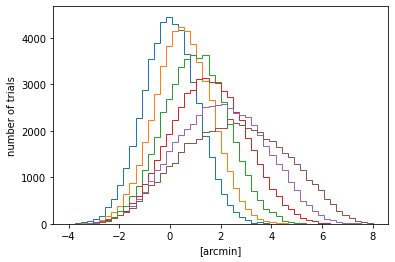

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
N=10
ni=[1.0,0.7,0.5,0.3,0.]
FWHM=8
dist_list=[]
sigma_list=[]
two_sigma_list=[]
mean_sigma_list=[]

for d in range(0, 6):
    dist_list.append(d)
    print("distance = ", d)
    mean_list=[]
    for i in range(10000):
        A = []
        for n in range(len(ni)):
            n1=int(N*ni[n])
            n2=N-n1
            a1=np.random.normal(
                loc   = 0,
                scale = FWHM/2.35,
                size  = n1,
                )
            #print("a1= ", a1)
            a2=np.random.normal(
                loc   = d,
                scale = FWHM/2.35,
                size  = n2,
                )
            #print("a2 ", a2)
            A=np.append(a1,a2)
            #print(A)
            mean=np.mean(A)
            mean_list.append(mean)
            #print("n1 = ", n1)
            #print("n2 = ", n2)
            #print("mean = ", mean)
            #plt.hist(a1)
            #plt.hist(A,bins=50,histtype="step",label="gaus1:gaus2 = {:.1f} : {:.1f}".format(ni[n], 1-ni[n]))
            #plt.xlabel("[arcmin]")
            #plt.ylabel("number of trials")
            #plt.legend(bbox_to_anchor=(1.05,0.9))
        #print("mean_list =", mean_list)
    plt.hist(mean_list, bins=50,histtype="step",range=(-4,8))
    mean_of_mean=np.mean(mean_list)
    print("mean_of_mean = ", mean_of_mean)

    plt.xlabel("[arcmin]")
    plt.ylabel("number of trials")


    #print("total mean_list =", mean_list)
    st_d=np.std(mean_list)
    sigma_list.append(st_d)
    two_sigma_list.append(st_d*2)
    mean_plus_sigma=mean_of_mean+st_d
    mean_sigma_list.append(mean_plus_sigma)
    print("Standard deviation = ", st_d)
print(mean_sigma_list)

[0, 1, 2, 3, 4, 5] [2.1434678846297657, 2.2616643428375705, 2.5586089157790677, 2.9607343202132475, 3.4707221050670403, 4.031916997927276]
         2
0.05477 x + 0.111 x + 2.125


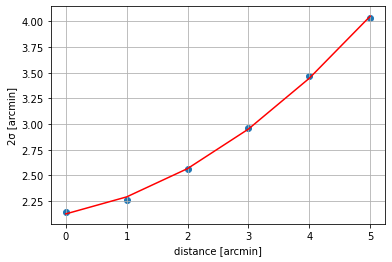

In [60]:
print(dist_list, two_sigma_list)
plt.scatter(dist_list,two_sigma_list)
plt.xlabel("distance [arcmin]")
plt.ylabel("2σ [arcmin]")
plt.grid()

linear_model=np.polyfit(dist_list,two_sigma_list,2)
linear_model_fn=np.poly1d(linear_model)
#x_s=np.arange(0,N+1)
x_s=np.arange(0,d+1)
plt.plot(x_s,linear_model_fn(x_s),color="red")
print(linear_model_fn)

[0, 1, 2, 3, 4, 5] [1.0709463786858289, 1.6410527571968623, 2.2962768582909368, 3.0042320725092413, 3.664489793840992, 4.5253208652185535]
 
0.6871 x + 0.9825


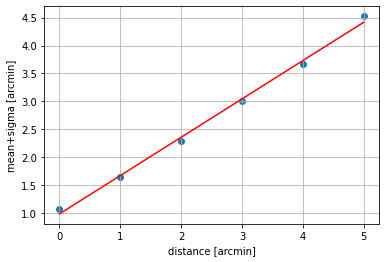

In [48]:
print(dist_list, mean_sigma_list)
plt.scatter(dist_list,mean_sigma_list)
plt.xlabel("distance [arcmin]")
plt.ylabel("mean+sigma [arcmin]")
plt.grid()

linear_model=np.polyfit(dist_list,mean_sigma_list,1)
linear_model_fn=np.poly1d(linear_model)
#x_s=np.arange(0,N+1)
x_s=np.arange(0,d+1)
plt.plot(x_s,linear_model_fn(x_s),color="red")
print(linear_model_fn)